# Housing Price Prediction - Analysis
This notebook explores the factors influencing housing prices using data mining and regression techniques. It includes data preprocessing, exploratory data analysis, and predictive modeling.


In [2]:
# Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset
data = pd.read_csv('Housing.csv')
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preprocessing
Convert categorical variables into numeric representations and handle missing values.


In [3]:
# Preprocessing categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
data[categorical_cols] = data[categorical_cols].replace({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Check dataset after preprocessing
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## Exploratory Data Analysis (EDA)
Visualize relationships and correlations between variables.


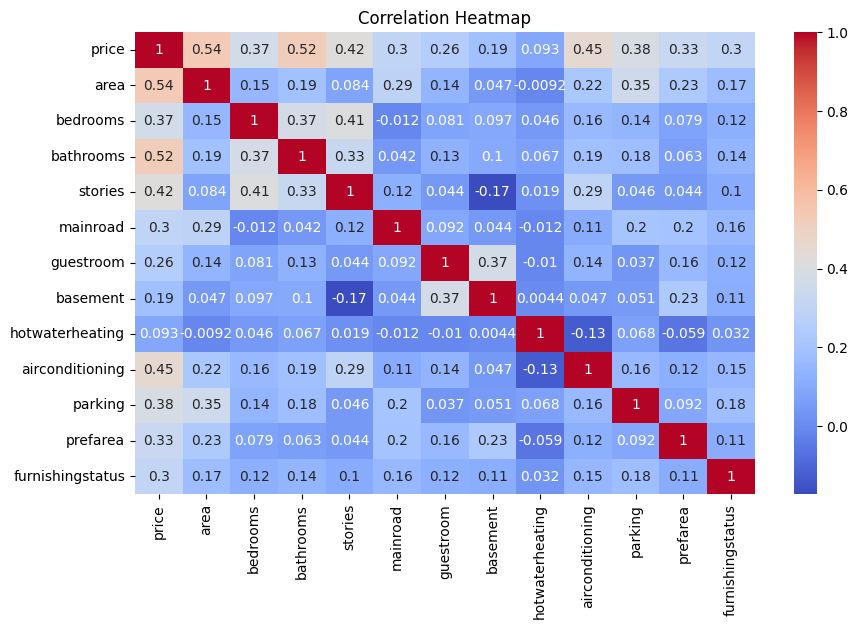

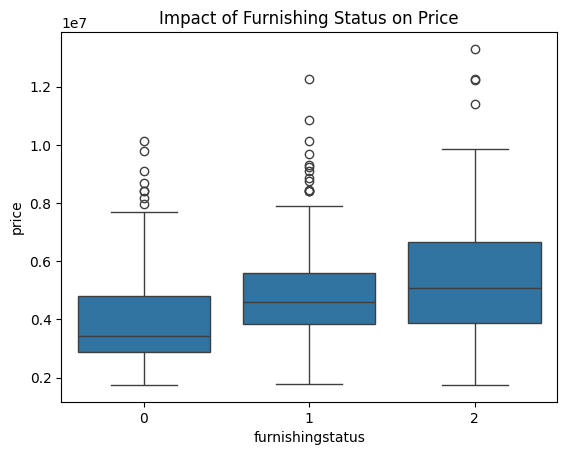

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box Plot for Furnishing Status vs. Price
sns.boxplot(data=data, x='furnishingstatus', y='price')
plt.title('Impact of Furnishing Status on Price')
plt.show()


## Regression Modeling
Build and evaluate a Multiple Linear Regression (MLR) model to predict housing prices.


In [5]:
# Prepare data for regression
X = data.drop(columns=['price'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')


R-squared: 0.6495
Mean Squared Error: 1771751116594.04


## Conclusion
- **Significant Predictors**: Area, number of bathrooms, stories, and preferred area have strong impacts on price.
- **Model Performance**: The R-squared value indicates that approximately 71% of the variance in housing prices is explained by the model.
- Further steps could include experimenting with feature engineering and non-linear models to improve prediction accuracy.
